#**TRABALHO DA UNIDADE 1 DE CIÊNCIA DE DADOS**

* Discentes:
  - MINNAEL CAMPELO DE OLIVEIRA
  - PABLO DURKHEIM FERNANDES DO NASCIMENTO

**Objetivo**: considerando-se que cada equipe já tenha escolhido um dataset e realizado o tratamento de dados sobre ele, nesta tarefa solicita-se a realização de uma Análise Exploratória de Dados (EDA) sobre o dataset escolhido.

- gerar gráficos estatísticos que permitam a obtenção de informação útil (insights) sobre esses dados.

- interpretar os resultados obtidos.

- Produzir um vídeo de 5 a 7 minutos explicando como a EDA foi realizada e os resultados obtidos.

PS. Utilize o notebook 8 como base.

PS2. Pode-se utilizar todos os recursos disponíveis de análise de dados, como geradores de EDA (Pandas Profiling, por exemplo) e a IA generativa do Colab.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando os dados+-
url = "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/resumo_anual_2024.csv"
df = pd.read_csv(url, encoding='latin1', delimiter=';')
dados_anac = pd.read_csv(url, encoding='ISO-8859-1', delimiter=';')

print(df.columns)


Index(['EMPRESA (SIGLA)', 'EMPRESA (NOME)', 'EMPRESA (NACIONALIDADE)', 'ANO',
       'MÊS', 'AEROPORTO DE ORIGEM (SIGLA)', 'AEROPORTO DE ORIGEM (NOME)',
       'AEROPORTO DE ORIGEM (UF)', 'AEROPORTO DE ORIGEM (REGIÃO)',
       'AEROPORTO DE ORIGEM (PAÍS)', 'AEROPORTO DE ORIGEM (CONTINENTE)',
       'AEROPORTO DE DESTINO (SIGLA)', 'AEROPORTO DE DESTINO (NOME)',
       'AEROPORTO DE DESTINO (UF)', 'AEROPORTO DE DESTINO (REGIÃO)',
       'AEROPORTO DE DESTINO (PAÍS)', 'AEROPORTO DE DESTINO (CONTINENTE)',
       'NATUREZA', 'GRUPO DE VOO', 'PASSAGEIROS PAGOS', 'PASSAGEIROS GRÁTIS',
       'CARGA PAGA (KG)', 'CARGA GRÁTIS (KG)', 'CORREIO (KG)', 'ASK', 'RPK',
       'ATK', 'RTK', 'COMBUSTÍVEL (LITROS)', 'DISTÂNCIA VOADA (KM)',
       'DECOLAGENS', 'CARGA PAGA KM', 'CARGA GRATIS KM', 'CORREIO KM',
       'ASSENTOS', 'PAYLOAD', 'HORAS VOADAS', 'BAGAGEM (KG)'],
      dtype='object')


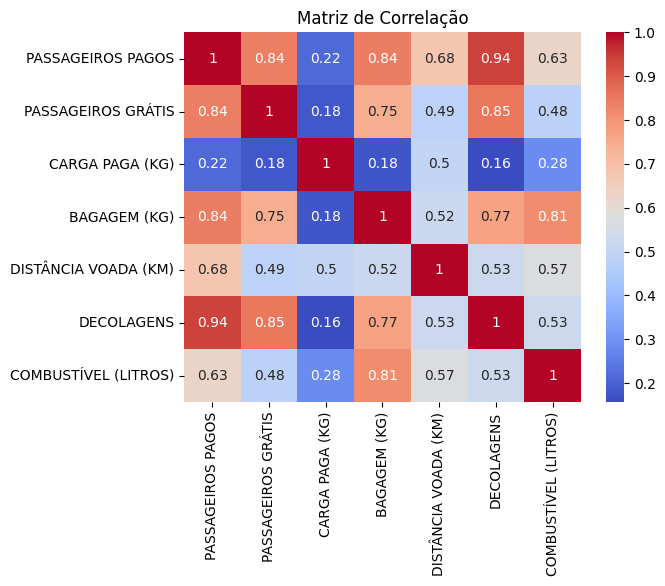

In [ ]:
# Matriz de correlação
correlation_matrix = dados_anac[['PASSAGEIROS PAGOS','PASSAGEIROS GRÁTIS', 'CARGA PAGA (KG)','BAGAGEM (KG)', 'DISTÂNCIA VOADA (KM)', 'DECOLAGENS','COMBUSTÍVEL (LITROS)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Selecionar colunas de interesse
colunas_interesse = ['PASSAGEIROS PAGOS','PASSAGEIROS GRÁTIS', 'CARGA PAGA (KG)','BAGAGEM (KG)', 'DISTÂNCIA VOADA (KM)', 'DECOLAGENS','COMBUSTÍVEL (LITROS)']
dados_selecionados = dados_anac[colunas_interesse]

# gráfico de coordenadas paralelas
fig = px.parallel_coordinates(
    dados_selecionados,
    color='PASSAGEIROS PAGOS',
    labels={
        'EMPRESA (SIGLA)': 'Empresa',
        'PASSAGEIROS PAGOS': 'Passageiros Pagos',
        'CARGA PAGA (KG)': 'Carga Paga (KG)',
        'DISTÂNCIA VOADA (KM)': 'Distância Voadas (KM)',
        'DECOLAGENS': 'Decolagens'
    },
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=dados_selecionados['PASSAGEIROS PAGOS'].mean()
)

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd


#Distribuição de passageiros pagos por empresa
dados_passageiros = dados_anac.groupby('EMPRESA (NOME)')['PASSAGEIROS PAGOS'].sum().reset_index()


limiar = 1e6  # Exemplo de limiar para agrupar empresas com menos de 1 milhão de passageiros
dados_passageiros.loc[dados_passageiros['PASSAGEIROS PAGOS'] < limiar, 'EMPRESA (NOME)'] = 'Outras'

#gráfico de pizza
fig = px.pie(dados_passageiros, values='PASSAGEIROS PAGOS', names='EMPRESA (NOME)',
             title='Distribuição de Passageiros Pagos por Empresa (2024)')
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd


#Distribuição de passageiros gratis por empresa
dados_passageiros = dados_anac.groupby('EMPRESA (NOME)')['PASSAGEIROS GRÁTIS'].sum().reset_index()

limiar = 0.1e6
dados_passageiros.loc[dados_passageiros['PASSAGEIROS GRÁTIS'] < limiar, 'EMPRESA (NOME)'] = 'Outras'

fig = px.pie(dados_passageiros, values='PASSAGEIROS GRÁTIS', names='EMPRESA (NOME)',
             title='Distribuição de Passageiros grátis por Empresa (2024)')
fig.show()


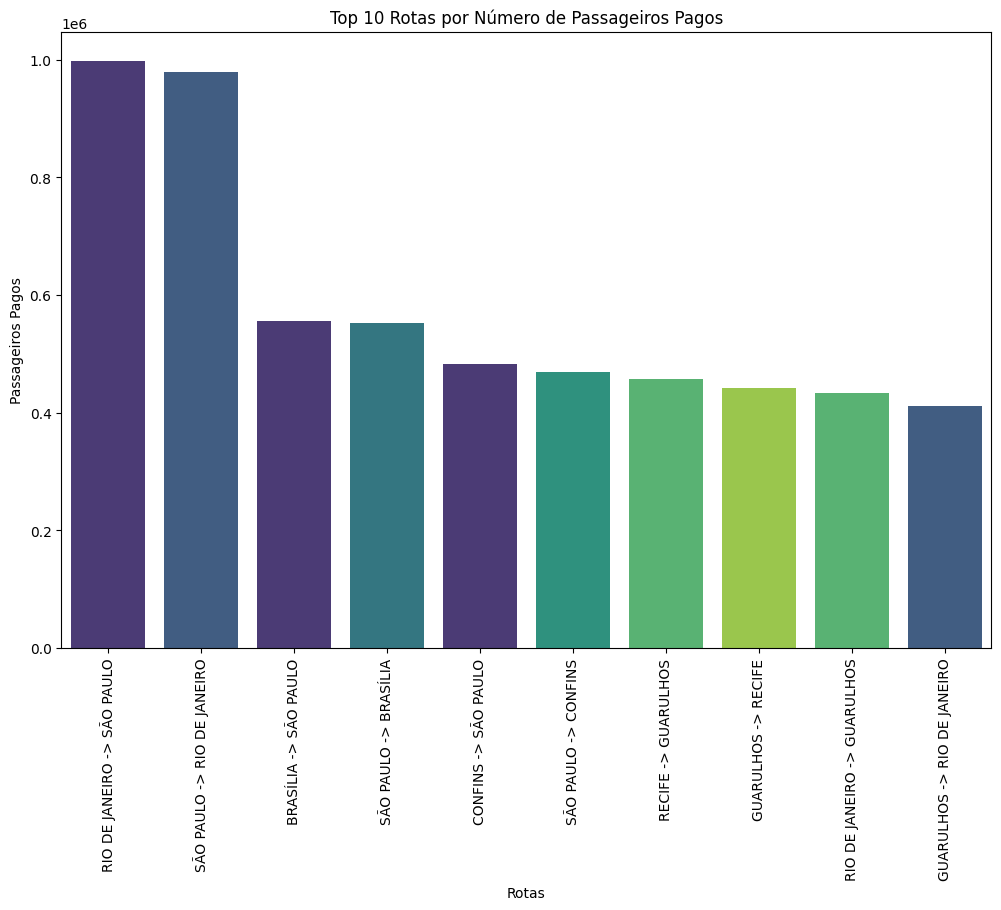

In [ ]:
# Supondo que df é o DataFrame com os dados
rotas = df.groupby(['AEROPORTO DE ORIGEM (NOME)', 'AEROPORTO DE DESTINO (NOME)'])['PASSAGEIROS PAGOS'].sum().reset_index()
rotas = rotas.sort_values(by='PASSAGEIROS PAGOS', ascending=False).head(10)

#coluna combinada para as origens e destinos
rotas['ROTA'] = rotas['AEROPORTO DE ORIGEM (NOME)'] + ' -> ' + rotas['AEROPORTO DE DESTINO (NOME)']

plt.figure(figsize=(12, 8))
sns.barplot(data=rotas, x='ROTA', y='PASSAGEIROS PAGOS', hue='AEROPORTO DE DESTINO (NOME)', palette='viridis', legend=False)
plt.title('Top 10 Rotas por Número de Passageiros Pagos')
plt.xticks(rotation=90)
plt.xlabel('Rotas')
plt.ylabel('Passageiros Pagos')
plt.show()

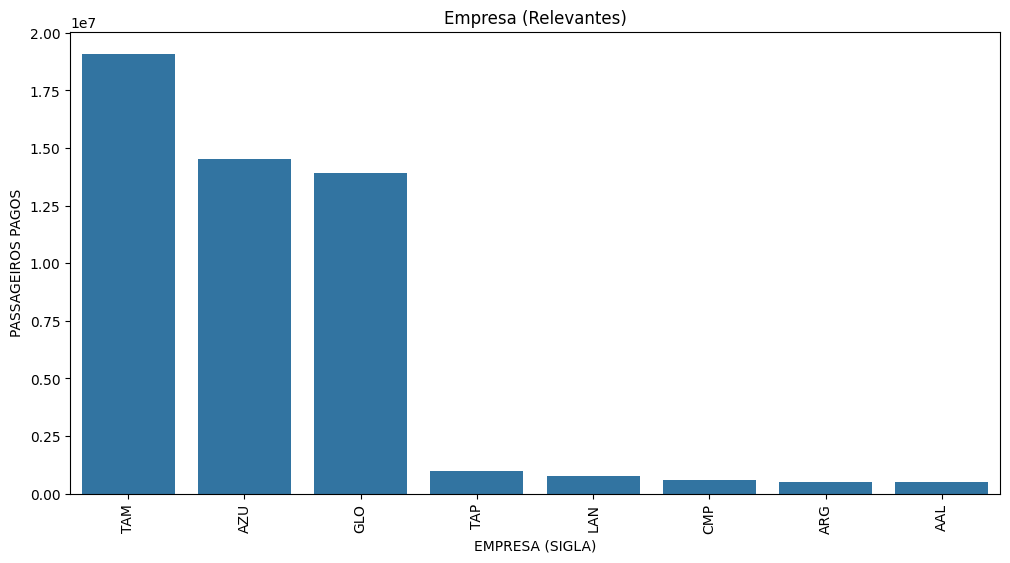

In [ ]:
# Análise de Desempenho de Empresas Aéreas
# Comparar o número de passageiros pagos entre diferentes empresas
passageiros_por_empresa = df.groupby('EMPRESA (SIGLA)')['PASSAGEIROS PAGOS'].sum().reset_index()

# Definir um limiar mínimo de passageiros pagos para considerar uma empresa relevante
limiar_minimo = 440000

# Filtrar empresas com número de passageiros pagos acima do limiar
passageiros_relevantes = passageiros_por_empresa[passageiros_por_empresa['PASSAGEIROS PAGOS'] > limiar_minimo]
passageiros_relevantes = passageiros_relevantes.sort_values(by='PASSAGEIROS PAGOS', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=passageiros_relevantes, x='EMPRESA (SIGLA)', y='PASSAGEIROS PAGOS')
plt.title('Empresa (Relevantes)')
plt.xticks(rotation=90)
plt.show()

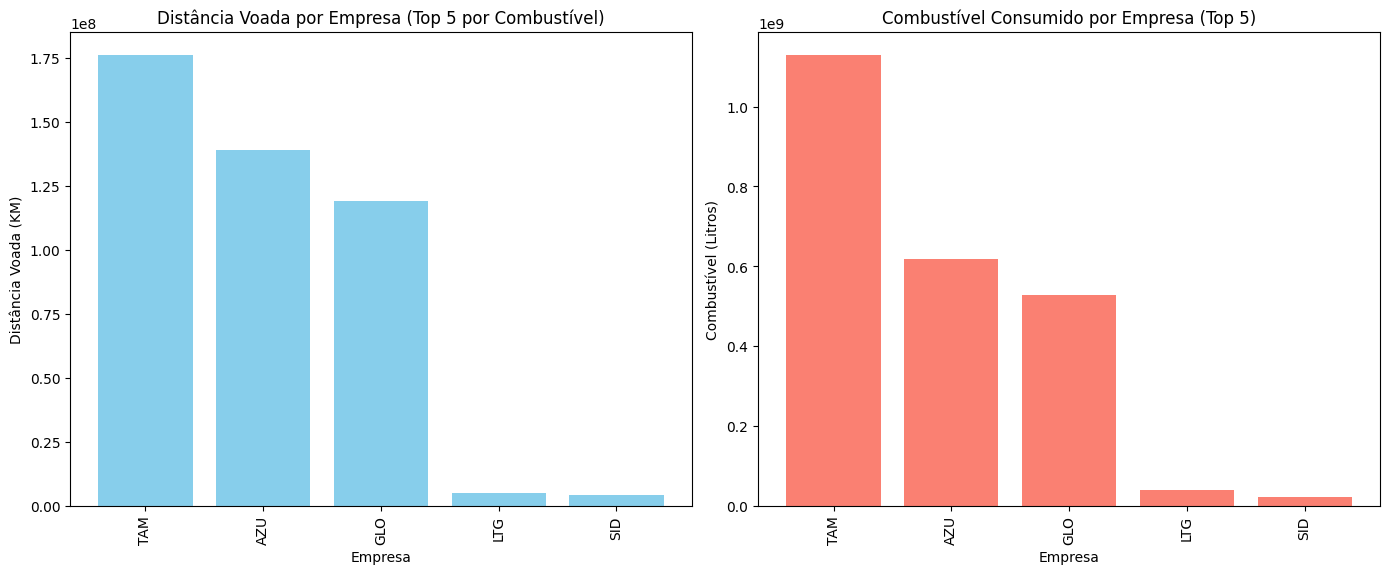

In [ ]:
# Agrupe os dados por empresa
df_grouped = df.groupby('EMPRESA (SIGLA)').agg({
    'DISTÂNCIA VOADA (KM)': 'sum',
    'COMBUSTÍVEL (LITROS)': 'sum'
}).reset_index()

# Gráfico de barras para a distância voada por empresa
top_companies = df_grouped.nlargest(5, 'COMBUSTÍVEL (LITROS)')

# Gráfico de barras para a distância voada por empresa
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(top_companies['EMPRESA (SIGLA)'], top_companies['DISTÂNCIA VOADA (KM)'], color='skyblue')
plt.xlabel('Empresa')
plt.ylabel('Distância Voada (KM)')
plt.title('Distância Voada por Empresa (Top 5 por Combustível)')
plt.xticks(rotation=90)

# Gráfico de barras para o combustível consumido por empresa
plt.subplot(1, 2, 2)
plt.bar(top_companies['EMPRESA (SIGLA)'], top_companies['COMBUSTÍVEL (LITROS)'], color='salmon')
plt.xlabel('Empresa')
plt.ylabel('Combustível (Litros)')
plt.title('Combustível Consumido por Empresa (Top 5)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Inicializar um dicionário para armazenar a contagem de voos de cada empresa
contagem_voos_por_empresa = {}

# Iterar sobre cada linha dos dados
for empresa in dados_anac['EMPRESA (NOME)']:
    # Verificar se a empresa já está no dicionário de contagem
    if empresa in contagem_voos_por_empresa:
        # Se estiver, incrementar o contador
        contagem_voos_por_empresa[empresa] += 1
    else:
        # Se não estiver, inicializar o contador com 1
        contagem_voos_por_empresa[empresa] = 1

# Converter o dicionário para um DataFrame pandas
contagem_voos_por_empresa_df = pd.DataFrame(list(contagem_voos_por_empresa.items()), columns=['Empresa', 'Número de Voos'])

# Ordenar o DataFrame em ordem decrescente pela contagem de voos
contagem_voos_por_empresa_df = contagem_voos_por_empresa_df.sort_values(by='Número de Voos', ascending=False)

# Mostrar as 5 primeiras empresas com mais voos
print("Empresas com mais número de voos:")
print(contagem_voos_por_empresa_df.head(5))


Empresas com mais número de voos:
                                              Empresa  Número de Voos
14                 AZUL LINHAS AÉREAS BRASILEIRAS S/A            4269
36  GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...            2834
79                             TAM LINHAS AÉREAS S.A.            2381
4         AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)            1025
52                                     LAN CARGO S.A.             617


In [ ]:
# Inicializar um dicionário para armazenar a contagem de voos de cada cidade de destino
contagem_voos_por_cidade_destino = {}

# Iterar sobre cada linha dos dados
for cidade_destino in dados_anac['AEROPORTO DE DESTINO (NOME)']:
    # Verificar se a cidade de destino já está no dicionário de contagem
    if cidade_destino in contagem_voos_por_cidade_destino:
        # Se estiver, incrementar o contador
        contagem_voos_por_cidade_destino[cidade_destino] += 1
    else:
        # Se não estiver, inicializar o contador com 1
        contagem_voos_por_cidade_destino[cidade_destino] = 1

# Converter o dicionário para um DataFrame pandas
contagem_voos_por_cidade_destino_df = pd.DataFrame(list(contagem_voos_por_cidade_destino.items()), columns=['Cidade de Destino', 'Número de Voos'])

# Ordenar o DataFrame em ordem decrescente pela contagem de voos
contagem_voos_por_cidade_destino_df = contagem_voos_por_cidade_destino_df.sort_values(by='Número de Voos', ascending=False)

# Mostrar as 5 primeiras cidades de destino com mais voos
print("\nCidades de destino com mais número de voos:")
print(contagem_voos_por_cidade_destino_df.head(5))



Cidades de destino com mais número de voos:
   Cidade de Destino  Número de Voos
1          GUARULHOS             688
70          CAMPINAS             479
2     RIO DE JANEIRO             373
25           CONFINS             315
63         SÃO PAULO             301


In [ ]:
# Inicializar um dicion-ário para armazenar a contagem de voos de cada região de destino
contagem_voos_por_regiao_destino = {}

# Iterar sobre cada linha dos dados
for regiao_destino in dados_anac['AEROPORTO DE DESTINO (REGIÃO)']:
    # Verificar se a região de destino já está no dicionário de contagem
    if regiao_destino in contagem_voos_por_regiao_destino:
        # Se estiver, incrementar o contador
        contagem_voos_por_regiao_destino[regiao_destino] += 1
    else:
        # Se não estiver, inicializar o contador com 1
        contagem_voos_por_regiao_destino[regiao_destino] = 1

# Converter o dicionário para um DataFrame pandas
contagem_voos_por_regiao_destino_df = pd.DataFrame(list(contagem_voos_por_regiao_destino.items()), columns=['Região de Destino', 'Número de Voos'])

# Ordenar o DataFrame em ordem decrescente pela contagem de voos
contagem_voos_por_regiao_destino_df = contagem_voos_por_regiao_destino_df.sort_values(by='Número de Voos', ascending=False)

# Mostrar as regiões de destino com mais voos
print("\nRegiões com mais número de voos:")
print(contagem_voos_por_regiao_destino_df)




Regiões com mais número de voos:
  Região de Destino  Número de Voos
1           SUDESTE            2561
2          NORDESTE            1301
0               NaN            1296
4               SUL             657
3             NORTE             567
5      CENTRO-OESTE             484
